In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_parquet('../../preprocess/version_1/train.parquet')
train = train.drop(columns=['period'])

In [3]:
train.head()

,ID,category,target,activity,economic_category,road,license,time_from_start,has_insurance,normal_balance,...,days_default_mean_type_4,days_default_mean_type_5,days_default_var_type_1,days_default_var_type_2,days_default_var_type_3,days_default_var_type_4,days_default_var_type_5,count_month,count_product,count_entity
0,5c0d6d516b2f11e55dc7ccf911117c4648efe1e37ba65b...,category_1,0,activity_10,category_3,road_7,no,3.6778,no,no,...,-99999.0,-99999.0,0.780759,-99999.0,0.251037,-99999.0,-99999.0,0.0,2.0,3.0
1,5400f7a37ace9961a211785a78fe36048f652923984801...,category_1,0,activity_1,category_28,road_5,no,2.5808,yes,no,...,-99999.0,-99999.0,-99999.000000,0.0,0.003995,-99999.0,-99999.0,0.0,1.0,1.0
2,5d35f55df443cc3b6d903f12ee1f05a8fa563fef0635c8...,category_1,0,activity_1,category_28,road_3,no,0.3026,yes,yes,...,-99999.0,-99999.0,0.007788,-99999.0,0.000000,-99999.0,-99999.0,0.0,2.0,2.0
3,a6f2cec37995d3a5793ec0e4489c69d396b9e1f80059c1...,category_1,0,activity_10,category_33,road_4,no,3.9883,no,yes,...,-99999.0,-99999.0,0.000000,0.0,0.000000,-99999.0,-99999.0,0.0,3.0,3.0
4,071a27b4ea5c188bebf86cbd8e2a7a910f7abc44023da6...,category_1,0,activity_11,category_31,road_3,no,3.2864,no,yes,...,-99999.0,-99999.0,-99999.000000,-99999.0,0.000000,-99999.0,-99999.0,0.0,1.0,1.0


In [4]:
train['category'].value_counts(normalize=True)

category_1    0.825756
category_3    0.090330
category_2    0.083915
Name: category, dtype: float64

In [5]:
train.groupby(by=['category'])['target'].value_counts(normalize=True)

category    target
category_1  0         0.980872
            1         0.019128
category_2  0         0.615799
            1         0.384201
category_3  0         0.990040
            1         0.009960
Name: target, dtype: float64

In [10]:
test = pd.read_parquet('../../preprocess/version_1/test.parquet')
test['category'].value_counts(normalize=True)

category_1    0.892343
category_2    0.059138
category_3    0.048519
Name: category, dtype: float64

# Analisis Exploratorio

## Analisis univariable - grafico 

In [6]:
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['target']]

In [7]:
categorical_cols = train.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['ID']]

In [8]:
train[categorical_cols] = train[categorical_cols].astype('category')

### Variables Numericas - Normal

In [ ]:
for col in numeric_cols:
    sns.violinplot(x ='category', y =col, data = train[train[col]!=-99999.0],
              jitter = True, hue ='target', dodge = True).set(title=f'Distribution of {col}')
    plt.show()

### Variables Numericas - sqrt

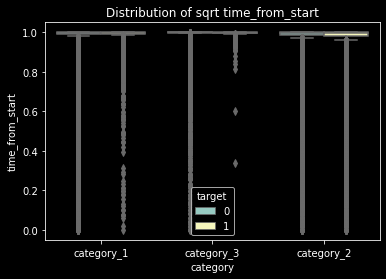

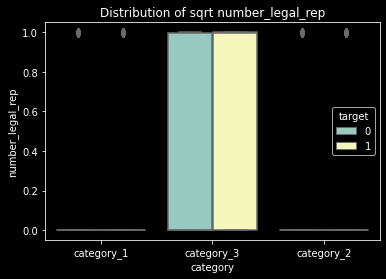

In [10]:
for col in numeric_cols:
    data = train[train[col]!=-99999.0]
    data[col] = np.tanh(data[col])
    sns.violinplot(x ='category', y =col, data = data,
              jitter = True, hue ='target', dodge = True).set(title=f'Distribution of sqrt {col}')
    plt.show()

### Variables Categoricas

In [6]:
df = train.groupby(['period']).agg(concentration_0=pd.NamedAgg(column='taken', aggfunc=concentration_0),).reset_index()
sns.barplot(x="hour",y='concentration_0',data=df).set(title='Hour vs. Concentration of Untaken')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810264 entries, 0 to 810263
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   period             810264 non-null  object
 1   activity           810264 non-null  object
 2   economic_category  810264 non-null  object
 3   road               810264 non-null  object
 4   license            810264 non-null  object
 5   has_insurance      810264 non-null  object
 6   normal_balance     810264 non-null  object
 7   bureau_risk        810264 non-null  object
dtypes: object(8)
memory usage: 55.6+ MB


## Analisis de Correlacion - Asociacion

## Modelo 1

## Modelo por category

In [9]:
train_cat_1 = train[train['category']=='category_1'].reset_index(drop=True)
train_cat_2 = train[train['category']=='category_2'].reset_index(drop=True)
train_cat_3 = train[train['category']=='category_3'].reset_index(drop=True)

### Category_1

In [10]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

X_cat_1 = train_cat_1.drop(columns=['ID','target'])
categorical_features_indices = np.where(X_cat_1.dtypes == 'category')[0]

In [11]:
from sklearn.model_selection import train_test_split

X_cat_1 = X_cat_1.to_numpy()
y_cat_1 = train_cat_1['target'].to_numpy()
X_train_cat_1, X_test_cat_1, y_train_cat_1, y_test_cat_1 = train_test_split(X_cat_1, y_cat_1, test_size=0.25, random_state=42)

In [12]:
categorical_features_indices

array([0, 1, 2, 3, 4, 6, 7, 8])

In [14]:
from catboost import Pool
from catboost import CatBoostClassifier

cat_1_pool = Pool(data=X_cat_1, label=y_cat_1, cat_features=categorical_features_indices)

In [45]:
from catboost import cv

# parameters for training inside cv:
params_1 = {
    'loss_function': 'Logloss',
    'iterations': 755,
    'custom_loss': 'F1',
    'learning_rate': 0.1,
    'depth':10,
    'scale_pos_weight':10,
    'random_state':42
}

In [15]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-Logloss-mean'].min()
    best_iter = cv_data['test-Logloss-mean'].values.argmin()

    print('Best validation Logloss score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Logloss-std'][best_iter],
        best_iter)
    )

In [26]:
cv_data = cv(
    params = params_1,
    pool = cat_1_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=True,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.002685896146
bestIteration = 528

Training on fold [1/5]

bestTest = 0.00275454998
bestIteration = 726

Training on fold [2/5]

bestTest = 0.002741879034
bestIteration = 608

Training on fold [3/5]

bestTest = 0.0028116916
bestIteration = 65

Training on fold [4/5]

bestTest = 0.002806100169
bestIteration = 173

Best validation Logloss score : 0.0028±0.0001 on step 356


In [37]:
model_cat_1=CatBoostClassifier(iterations=500, depth=7, learning_rate=0.04,scale_pos_weight=12, random_state=42)
model_cat_1.fit(X_train_cat_1, y_train_cat_1,eval_set=(X_test_cat_1, y_test_cat_1),cat_features=categorical_features_indices,plot=True,verbose=False)
#model_cat_1.fit(X_cat_1,y_cat_1,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
pred = model_cat_1.predict(X_cat_1)
train_cat_1['preds'] = pred

#### Evaluacion

In [17]:
from sklearn.metrics import f1_score

def prediccion(df:pd.DataFrame, category_column:str, target_column:str, pred_column):
    cat_counts = []
    f1_scores = []
    categories = df[category_column].unique()
    for cat in categories:
        temp = df[df[category_column]==cat]
        cat_counts.append(len(temp)/len(df))
        f1_scores.append(f1_score(temp[target_column],temp[pred_column]))
    cats = dict(zip(categories,f1_scores,cat_counts))
    return (np.sum(np.array(cat_counts) * np.array(f1_scores)), cats)

In [39]:
f1_score(train_cat_1['target'], train_cat_1['preds'])

0.38057230964582106

In [48]:
f1_score(train_cat_1['target'], train_cat_1['preds'])

0.6472660919901844

#### Calibration

### Category_2

In [16]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

X_cat_2 = train_cat_2.drop(columns=['ID','target'])
categorical_features_indices = np.where(X_cat_2.dtypes == 'category')[0]

In [17]:
X_cat_2 = X_cat_2.to_numpy()
y_cat_2 = train_cat_2['target'].to_numpy()

In [18]:
cat_2_pool = Pool(data=X_cat_2, label=y_cat_2, cat_features=categorical_features_indices)

In [19]:
params_cat_2 = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': 'F1',
    'learning_rate': 0.01,
    'depth':8,
    'scale_pos_weight':2,
    'random_state':42
}

In [20]:
cv_data = cv(
    params = params_cat_2,
    pool = cat_2_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=False,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5602035268
bestIteration = 299

Training on fold [1/5]

bestTest = 0.5617564784
bestIteration = 299

Training on fold [2/5]

bestTest = 0.5642980029
bestIteration = 299

Training on fold [3/5]

bestTest = 0.5622542313
bestIteration = 299

Training on fold [4/5]

bestTest = 0.5662596706
bestIteration = 299

Best validation Logloss score : 0.5630±0.0024 on step 299


In [21]:
model_cat_2=CatBoostClassifier(iterations=299, depth=10, learning_rate=0.1,scale_pos_weight=2, random_state=42)
model_cat_2.fit(X_cat_2, y_cat_2,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
pred = model_cat_2.predict(X_cat_2)
train_cat_2['preds'] = pred

#### Evaluacion

In [24]:
from sklearn.metrics import f1_score

f1_score(train_cat_2['target'], train_cat_2['preds'])

0.7769711960710509

#### Calibration

### Category_3

In [25]:
X_cat_3 = train_cat_3.drop(columns=['ID','target'])
categorical_features_indices = np.where(X_cat_3.dtypes == 'category')[0]

In [26]:
X_cat_3 = X_cat_3.to_numpy()
y_cat_3 = train_cat_3['target'].to_numpy()

In [27]:
cat_3_pool = Pool(data=X_cat_3, label=y_cat_3, cat_features=categorical_features_indices)

In [56]:
params_cat_3 = {
    'loss_function': 'Logloss',
    'iterations': 550,
    'custom_loss': 'F1',
    'learning_rate': 0.008,
    'depth':7,
    'scale_pos_weight':12,
    'random_state':42
}

In [57]:
cv_data = cv(
    params = params_cat_3,
    pool = cat_3_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=True,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.222153318
bestIteration = 549

Training on fold [1/5]

bestTest = 0.2111678615
bestIteration = 549

Training on fold [2/5]

bestTest = 0.2135974174
bestIteration = 549

Training on fold [3/5]

bestTest = 0.2129593688
bestIteration = 549

Training on fold [4/5]

bestTest = 0.2053359557
bestIteration = 549

Best validation Logloss score : 0.2130±0.0060 on step 549


In [42]:
model_cat_3=CatBoostClassifier(iterations=300, depth=8, learning_rate=0.01,scale_pos_weight=15, random_state=42)
model_cat_3.fit(X_cat_3, y_cat_3,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [43]:
pred = model_cat_3.predict(X_cat_3)
train_cat_3['preds'] = pred

#### Evaluacion

In [44]:
f1_score(train_cat_3['target'], train_cat_3['preds'])

0.4522207267833109

#### Calibration

## Modelo Scikit Optimize

## Prediccion Final

In [74]:
model=CatBoostClassifier(iterations=699, depth=10, learning_rate=0.1,class_weights=[0.95,0.5], random_state=42)
model.fit(train_pool,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [75]:
test = pd.read_parquet('./preprocess/version_1/test.parquet')

In [76]:
test_x = test.drop(columns=['ID']).to_numpy()
pred = model.predict(test_x)
test['target'] = pred
test = test[['ID','target']]

In [77]:
test.to_csv('./entregables/version_1/prediccion_catboost_simple.csv',index=False)

In [78]:
model.save_model('./models/version_1/catboost_simple')

In [ ]:
model = CatBoostClassifier()
model. load_model("./models/version_1/catboost_simple")